In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import shap 
import lime 
import lime.lime_tabular

import warnings
warnings.filterwarnings("ignore")

In [25]:
data= load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print("Veri setinden ilk 5 satır:")
display(X.head())

print("Heedef değişken ilk 5 değeri:")
print(y[:5])

Veri setinden ilk 5 satır:


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

Heedef değişken ilk 5 değeri:
[0 0 0 0 0]



 Veri şekli: (569, 30)
Sınıf Dağılımı:
1    357
0    212
Name: count, dtype: int64

 Özelliklerin istatistiksel özeti:


mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

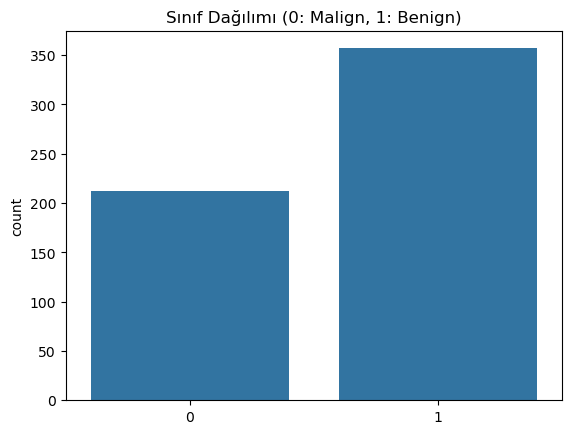

In [23]:
print("\n Veri şekli:", X.shape)
print("Sınıf Dağılımı:")
print(pd.Series(y).value_counts())

print("\n Özelliklerin istatistiksel özeti:")
display(X.describe())

sns.countplot(x=y)
plt.title("Sınıf Dağılımı (0: Malign, 1: Benign)")
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
X_tarin, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [29]:
 X_train,X_test, y_train, y_test = train_test_split(
     X_scaled, y, test_size=0.2, random_state=42
 )

In [33]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)


 Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


 Confusion Matrix:


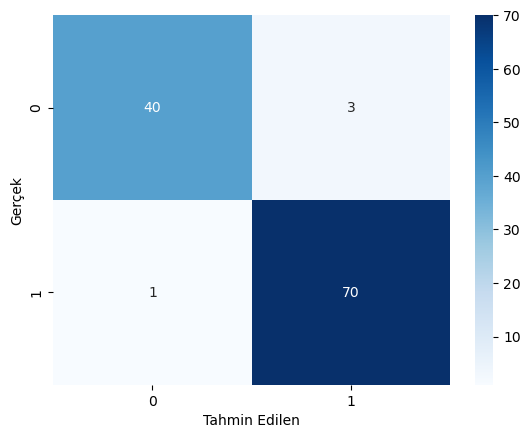


ROC AUC Skoru: 0.9953


In [41]:
y_pred = model.predict(X_test)

print("\n Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

print("\n Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

roc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"\nROC AUC Skoru: {roc_score:.4f}")


 SHAP summary plot:


<Figure size 640x480 with 0 Axes>

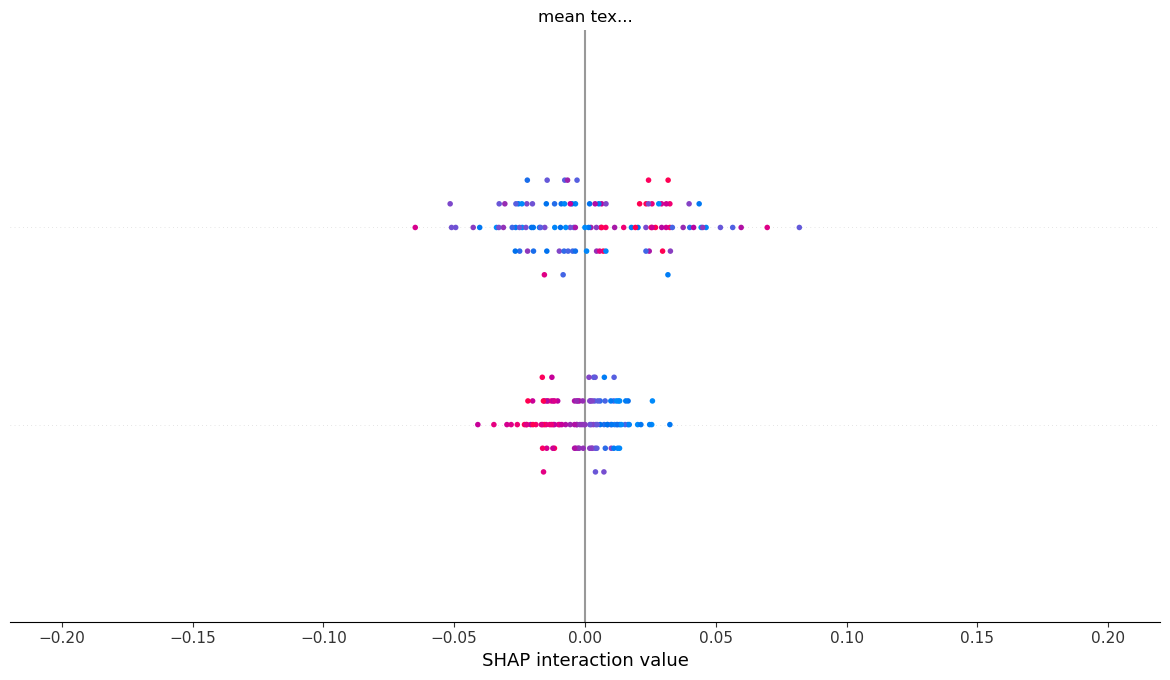

In [59]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

print("\n SHAP summary plot:")

# shap_values eğer listeyse (örneğin: [sınıf 0 için shap, sınıf 1 için shap])
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test, feature_names=data.feature_names)
else:
    shap.summary_plot(shap_values, X_test, feature_names=data.feature_names)

In [63]:
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=data.feature_names,
    class_names=data.target_names,
    mode="classification"
)

i = 0  
exp = explainer_lime.explain_instance(X_test[i], model.predict_proba)
print(f"\n LIME açıklaması - Örnek {i}:")
exp.show_in_notebook(show_table=True)


📝 LIME açıklaması - Örnek 0:


In [70]:
!pip install xgboost

In [77]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # ROC-AUC için
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values("ROC-AUC", ascending=False)
display(results_df)

Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.973684   0.972222  0.985915  0.979021  0.997380
1        Random Forest  0.964912   0.958904  0.985915  0.972222  0.995906
2              XGBoost  0.956140   0.958333  0.971831  0.965035  0.990829

In [81]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

<Figure size 640x480 with 0 Axes>

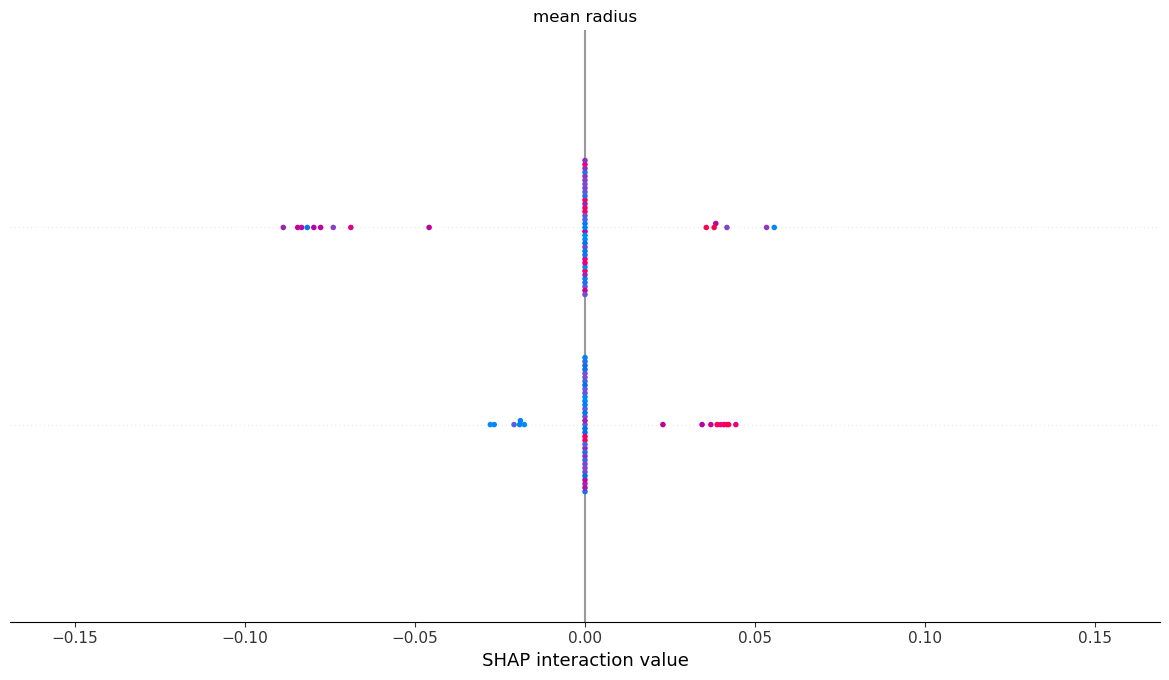

In [113]:
shap.summary_plot(shap_values, X_test.iloc[:50], feature_names=X.columns)

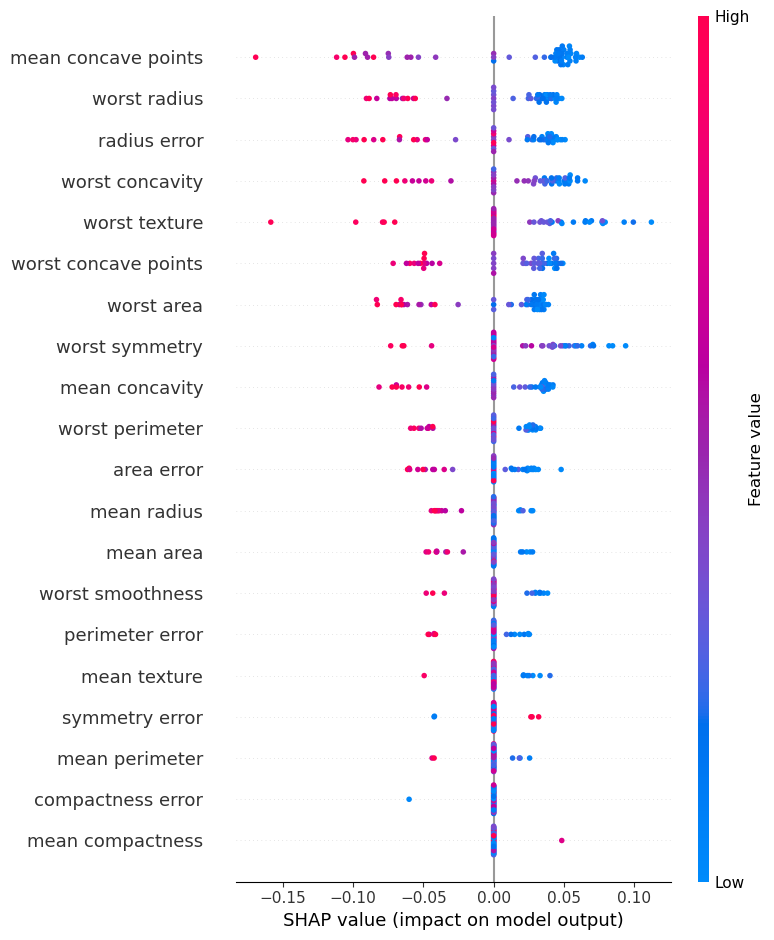

In [115]:
shap.summary_plot(shap_values[:, :, 1], X_test.iloc[:50], feature_names=X.columns)

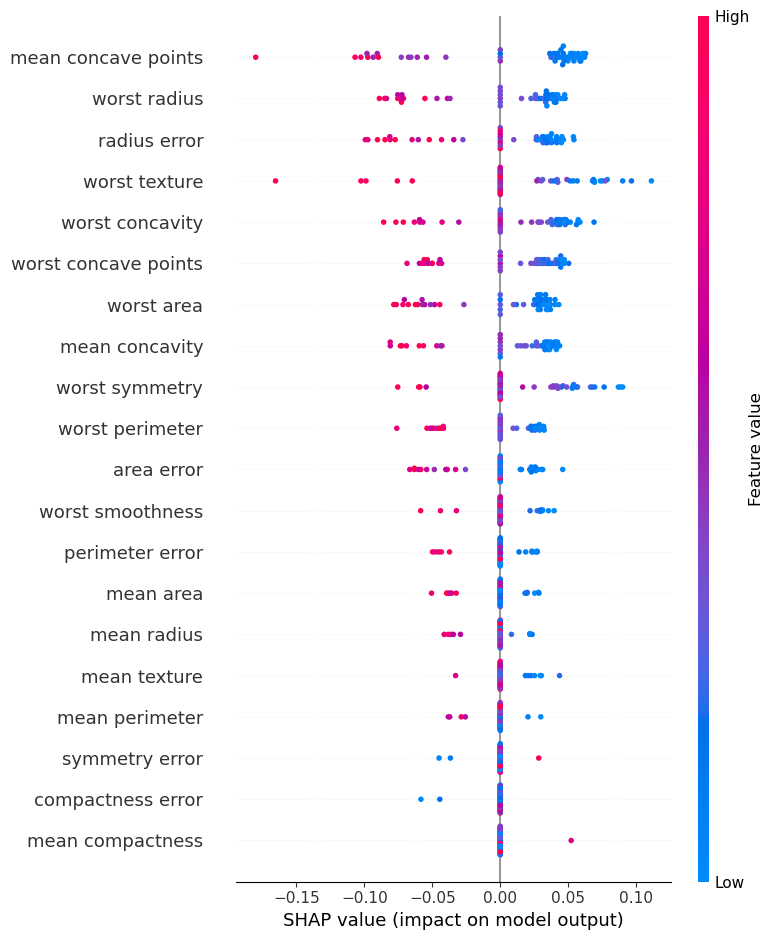

In [110]:
shap.summary_plot(shap_values[:, :, 1], X_test.iloc[:50], feature_names=X.columns)



In [117]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=['Benign', 'Malignant'],  
    mode='classification'
)

i = 0 
test_instance = X_test.iloc[i].values.reshape(1, -1)

exp = explainer.explain_instance(
    data_row=test_instance[0],
    predict_fn=model.predict_proba,
    num_features=10 
)

exp.show_in_notebook(show_table=True)


In [129]:
import pandas as pd

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


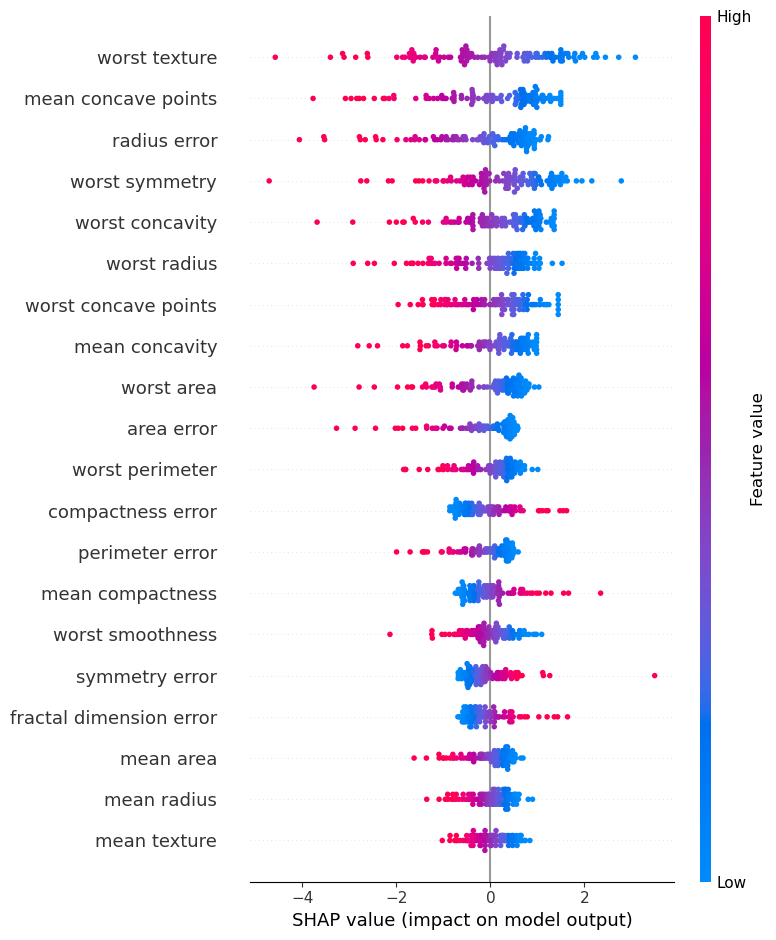

In [135]:
import shap

explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)


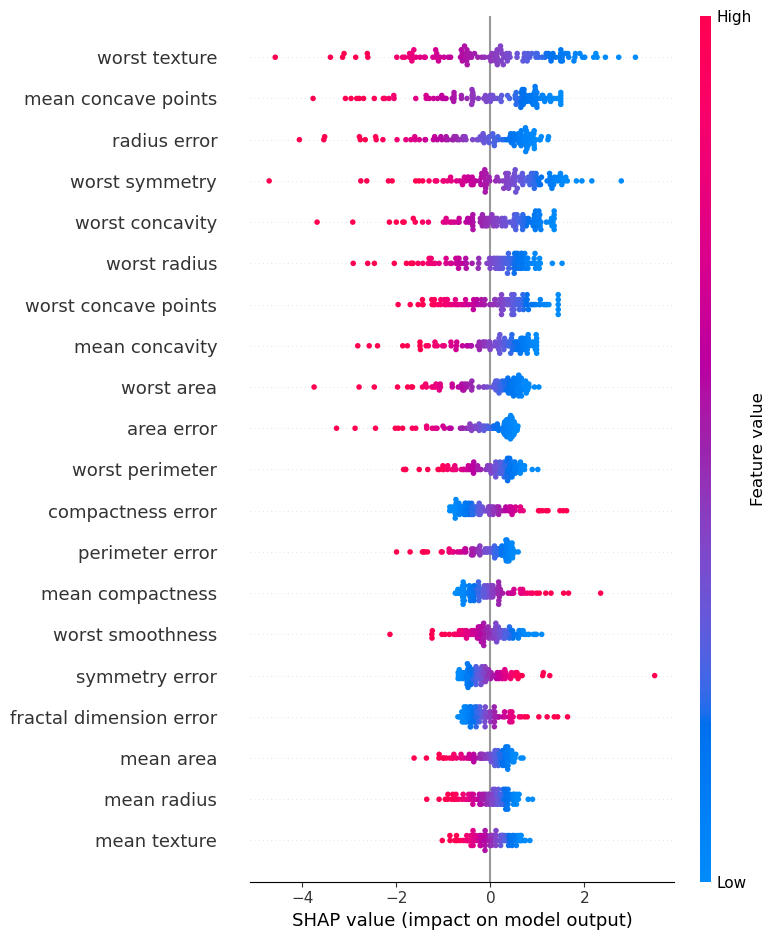

In [137]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [139]:
i = 0  
shap.force_plot(explainer.expected_value, shap_values[i], X_test.iloc[i], feature_names=X.columns)


In [147]:
import shap
import matplotlib.pyplot as plt

explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)

plt.savefig("shap_summary_logreg.png", dpi=300, bbox_inches='tight')
plt.close()


In [153]:
exp.save_to_file("lime_explanation.html")


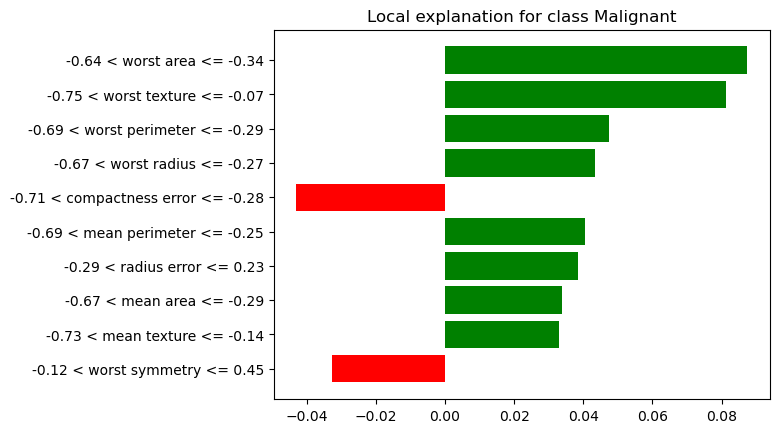

In [155]:
exp.as_pyplot_figure().savefig("lime_explanation.png")
